In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pickle

<AxesSubplot:>

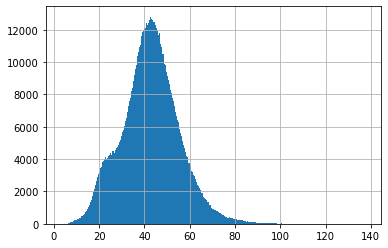

In [2]:
dataf=pd.read_csv('data_imp.csv',)#imputed data
dataf.rename({'0':'edge_id','1':'length','2':'minute','3':'speed','4':'is_holiday','5':'weather'},axis=1,inplace=True)
dataf['speed'].hist(bins=300)

In [3]:
dataForw=dataf.copy()
dataForw=dataForw[dataForw.speed>10]
dataForw=dataForw[dataForw.speed<80]
dataForw

,edge_id,length,minute,speed,is_holiday,weather
0,0.0,1618.0,605.0,45.490138,1.0,1.0
1,0.0,1618.0,180.0,58.136208,0.0,0.0
2,0.0,1618.0,770.0,35.708970,0.0,0.0
3,0.0,1618.0,970.0,33.432919,0.0,0.0
4,0.0,1618.0,980.0,40.524331,0.0,0.0
...,...,...,...,...,...,...
784219,389.0,1920.0,770.0,50.024419,0.0,0.0
784220,389.0,1920.0,675.0,52.047795,0.0,0.0
784221,389.0,1920.0,110.0,50.552516,0.0,1.0
784222,389.0,1920.0,990.0,39.998259,0.0,0.0


In [4]:
ct = ColumnTransformer([('weather', OneHotEncoder(), [5]),('is_holiday', OneHotEncoder(), [4])], remainder='passthrough')
onehot_data_start=ct.fit_transform(dataForw)
onehot_data_start=pd.DataFrame(onehot_data_start)
onehot_data_start.rename({0:'weather0',1:'weather1',2:'weather2',3:'is_holiday0',4:'is_holiday1',5:'edge_id',6:'length',7:'minute',8:'speed'},axis=1,inplace=True)

In [5]:
onehot_data_start

,weather0,weather1,weather2,is_holiday0,is_holiday1,edge_id,length,minute,speed
0,0.0,1.0,0.0,0.0,1.0,0.0,1618.0,605.0,45.490138
1,1.0,0.0,0.0,1.0,0.0,0.0,1618.0,180.0,58.136208
2,1.0,0.0,0.0,1.0,0.0,0.0,1618.0,770.0,35.708970
3,1.0,0.0,0.0,1.0,0.0,0.0,1618.0,970.0,33.432919
4,1.0,0.0,0.0,1.0,0.0,0.0,1618.0,980.0,40.524331
...,...,...,...,...,...,...,...,...,...
778477,1.0,0.0,0.0,1.0,0.0,389.0,1920.0,770.0,50.024419
778478,1.0,0.0,0.0,1.0,0.0,389.0,1920.0,675.0,52.047795
778479,0.0,1.0,0.0,1.0,0.0,389.0,1920.0,110.0,50.552516
778480,1.0,0.0,0.0,1.0,0.0,389.0,1920.0,990.0,39.998259


In [6]:
onehot_data_start['W']=(onehot_data_start['length']/(onehot_data_start['speed']*16.66667))
onehot_data_start.drop(['speed'],axis=1,inplace=True)

In [7]:
onehot_data_start['W']=onehot_data_start['W']*60

In [8]:
onehot_data_start.drop('W',axis=1)

,weather0,weather1,weather2,is_holiday0,is_holiday1,edge_id,length,minute
0,0.0,1.0,0.0,0.0,1.0,0.0,1618.0,605.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1618.0,180.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1618.0,770.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1618.0,970.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1618.0,980.0
...,...,...,...,...,...,...,...,...
778477,1.0,0.0,0.0,1.0,0.0,389.0,1920.0,770.0
778478,1.0,0.0,0.0,1.0,0.0,389.0,1920.0,675.0
778479,0.0,1.0,0.0,1.0,0.0,389.0,1920.0,110.0
778480,1.0,0.0,0.0,1.0,0.0,389.0,1920.0,990.0


In [9]:
#onehot_data_start=pd.concat([onehot_data_start,pd.get_dummies(onehot_data_start['edge_id'])],axis=1)
#onehot_data_start_droped=onehot_data_start.drop(['edge_id','W'],axis=1)

In [10]:
#columnn=[]
#for i in onehot_data_start_droped.columns:
#    if type(i)=='str':
#        columnn.append(i)
#    elif type(i)!='str':
#        columnn.append(str(i))

In [11]:
#columnn

In [12]:
#from sklearn.preprocessing import MinMaxScaler
#norm=MinMaxScaler((0,1))
#scaler_data_start=norm.fit_transform(onehot_data_start.drop('W',axis=1).copy())
#scaler_data_start=pd.DataFrame(scaler_data_start,columns=onehot_data_start.columns[0:8])
#scaler_data_start

In [13]:
#from sklearn.preprocessing import Normalizer
#norm2=Normalizer()
#scaler_data_start2=norm2.fit_transform(onehot_data_start.drop('W',axis=1).copy())
#scaler_data_start2=pd.DataFrame(scaler_data_start2,columns=onehot_data_start.drop('W',axis=1).columns)
#scaler_data_start2.columns


In [61]:
X=onehot_data_start.drop('W',axis=1)
y=onehot_data_start['W']
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.2,random_state=44)

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
params={'n_jobs':[-1]}

In [63]:
model=GridSearchCV(RandomForestRegressor(),param_grid=params,cv=2,verbose=10)

In [64]:
model.fit(X,y)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2; 1/1] START n_jobs=-1...................................................
[CV 1/2; 1/1] END ....................n_jobs=-1;, score=0.304 total time=  37.1s
[CV 2/2; 1/1] START n_jobs=-1...................................................
[CV 2/2; 1/1] END ....................n_jobs=-1;, score=0.351 total time=  34.2s


GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'n_jobs': [-1]}, verbose=10)

In [65]:
y_pred=model.predict(X_test)

In [66]:
y_true=Y_test
from sklearn import metrics

In [67]:
metrics.r2_score(y_true, y_pred)*100

89.08413040018229

In [68]:
model.score(X_train,Y_train)*100

88.93345688895265

In [69]:
metrics.mean_absolute_error(y_true, y_pred)

14.026298598245853

In [70]:
import math
len(y_pred)

155697

<AxesSubplot:>

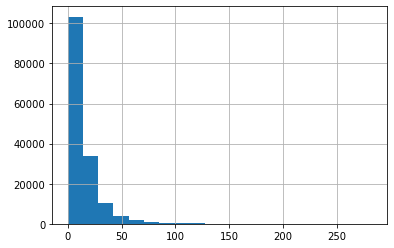

In [71]:
(abs((y_true-y_pred)).hist(bins=20))

In [72]:
count_of_error=0
for i in abs((y_true-y_pred)):
    if i>60:
        count_of_error+=1
(count_of_error/155697)*100

2.281996441806843

In [73]:
with open ('model0001.h','wb') as f:
    pickle.dump(model,f)

In [74]:
mygraph = nx.read_gpickle("network.gpickle")

In [75]:
def proces_data(start,holiday,wead):
    df_in={'weather0':0,'weather1':0,'weather2':0,'is_holiday0':0,'is_holiday1':0,'minute':[start]}
    if wead==0:
        df_in['weather0']=1
    elif wead==1:
        df_in['weather1']=1
    elif wead==2:
        df_in['weather2']=1
    if holiday==0:
        df_in['is_holiday0']=1
    elif holiday==1:
        df_in['is_holiday1']=1
    df_start=pd.DataFrame(df_in)
    dh=df_start
    for i in range(389):
        if i!=48:
            df_start=pd.concat([df_start,dh])
    df_start.reset_index(inplace=True)
    len_rod=pd.read_csv('dataset.csv')
    len_rod=len_rod[['edge_id','length']].sort_values(by='edge_id').groupby('edge_id').length.max()
    df_t={'edge_id':len_rod.index,'length':len_rod.values}
    df_start=pd.concat([df_start,pd.DataFrame(df_t)],axis=1)
    df_start.drop('index',axis=1,inplace=True)
    df_start=df_start[['weather0','weather1','weather2','is_holiday0','is_holiday1','edge_id','length','minute']]
    nnn=model.predict(df_start)
    edgess=np.array(mygraph.edges)
    for i in range(389):
        if i<48:
            for j in range(len(edgess)):
                if i==mygraph.get_edge_data(edgess[j][0],edgess[j][1])['id']:
                    mygraph.get_edge_data(edgess[j][0],edgess[j][1])['weight']=nnn[i]
        if i>=48:
            for j in range(len(edgess)):
                if i+1==mygraph.get_edge_data(edgess[j][0],edgess[j][1])['id']:
                    mygraph.get_edge_data(edgess[j][0],edgess[j][1])['weight']=nnn[i]
    return 

In [76]:
def rout(d,s,r,i,w):
    route_start_t=r
    is_holiday=i
    weather=w
    start_nod=s
    end_nod=d
    proces_data(route_start_t,is_holiday,weather)
    endtime=0
    dj=[0.0]
    while dj[-1]!=end_nod:
        nods=nx.dijkstra_path(mygraph,start_nod,end_nod, weight='weight')
        if len(nods)>2:
            ti=mygraph.get_edge_data(nods[0],nods[1])['weight']
            endtime+=(ti/60)
            proces_data(route_start_t+endtime,is_holiday,weather)
            dj.append(nods[0])
            start_nod=nods[1]
        elif len(nods)==2:
            ti=mygraph.get_edge_data(nods[0],nods[1])['weight']
            endtime+=(ti/60)
            dj.append(nods[0])
            dj.append(nods[1])
    return(endtime*60,dj[1:])

In [85]:
test_cases=pd.read_csv('test_cases.csv')
test_cases.drop(['eta','route'],axis=1,inplace=True)
test_cases_fich=test_cases[['src','dest','route_start_t','is_holiday','weather']].copy()
a={'eta':[],'route':[]}
for i in range(1,10001):
    ddf=(rout(test_cases_fich[i-1:i]['dest'][i-1],test_cases_fich[i-1:i]['src'][i-1],test_cases_fich[i-1:i]['route_start_t'][i-1],test_cases_fich[i-1:i]['is_holiday'][i-1],test_cases_fich[i-1:i]['weather'][i-1]))
    a['eta'].append(ddf[0])
    a['route'].append(ddf[1])
    print(i)

9985
9986
9987
9988
9989
9990
9991
9992
9993
9994
9995
9996
9997
9998
9999
10000


In [87]:
dff=pd.concat([test_cases_fich,pd.DataFrame(a)],axis=1)
dff

,src,dest,route_start_t,is_holiday,weather,eta,route
0,27,90,521,0,0,682.818462,"[27, 91, 146, 57, 36, 90]"
1,60,114,835,1,2,1295.905038,"[60, 86, 56, 163, 10, 114]"
2,18,112,668,0,0,746.183526,"[18, 36, 64, 107, 68, 112]"
3,96,18,1114,0,2,920.667181,"[96, 57, 36, 18]"
4,66,135,1116,0,0,963.756011,"[66, 89, 129, 111, 91, 146, 135]"
...,...,...,...,...,...,...,...
9995,82,194,605,0,0,815.005883,"[82, 109, 3, 134, 199, 147, 194]"
9996,75,159,497,0,1,592.534255,"[75, 29, 22, 167, 159]"
9997,14,176,712,0,0,774.442552,"[14, 71, 85, 102, 50, 176]"
9998,14,77,1136,0,0,716.758631,"[14, 71, 85, 77]"


In [88]:
dff.to_csv('test_cases_finall.csv')